# Imports and data initialization

In [147]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Social_Data_and_Visualisation/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [4]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Hour'] = [int(time[0:2]) for time in (df['Time'])]

# Part 1

In [36]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Filter the data to be within the period 2003-2017:

In [37]:
filter_p1 = (df['Year'] >= 2003) & (df['Year'] <= 2017)
df_p1 = df[filter_p1]

Method to plot in different time units:

In [138]:
def plotFocusCrimes(df, time_list, label_list, time_category):
  plt.figure(figsize=(25,20))

  for j,crime in enumerate(focuscrimes):
    numbers = np.zeros(len(time_list))
    for i, item in enumerate(time_list):
      numbers[i] = len(df[(df[time_category]==item) & (df['Category'] == crime)])
    
    plt.subplot(5,3,j+1)
    plt.title(crime)
    plt.bar(label_list,numbers)
  plt.show

In [142]:
month_array = df_p1['Month'].unique() ; month_array.sort()
hour_array = df_p1['Hour'].unique()   ; hour_array.sort()
day_array = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
hour_labels = ['00','01','02','03','04','05','06','07','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

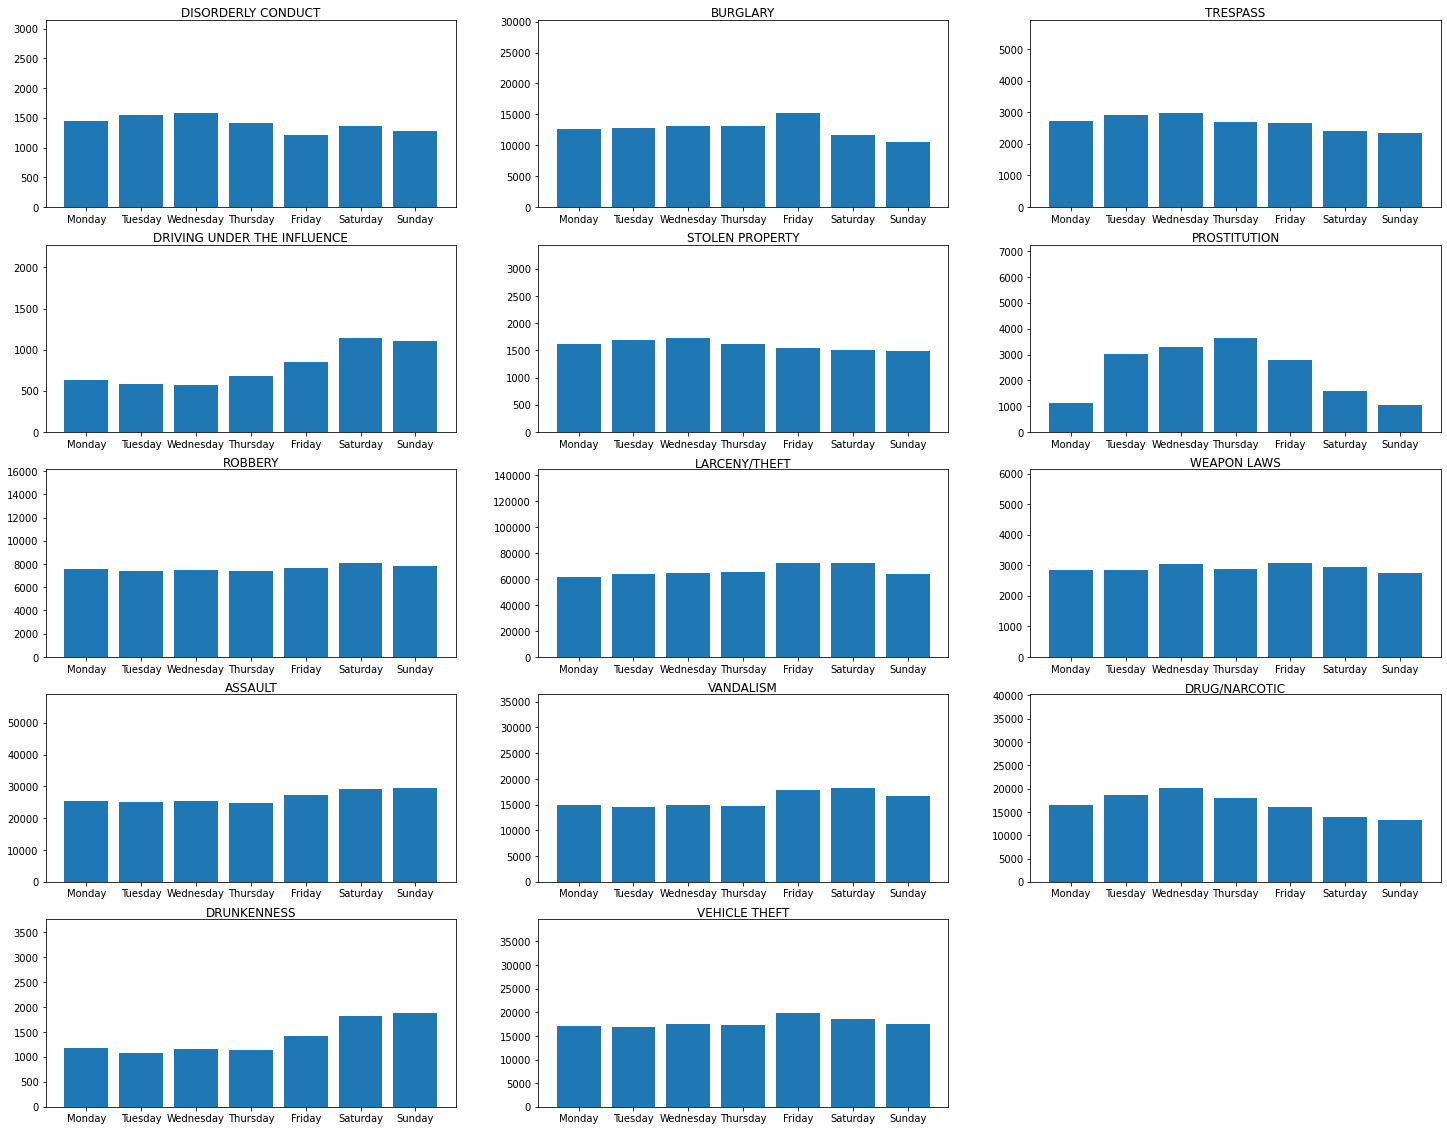

In [140]:
plotFocusCrimes(df_p1, day_array, day_array, 'DayOfWeek')

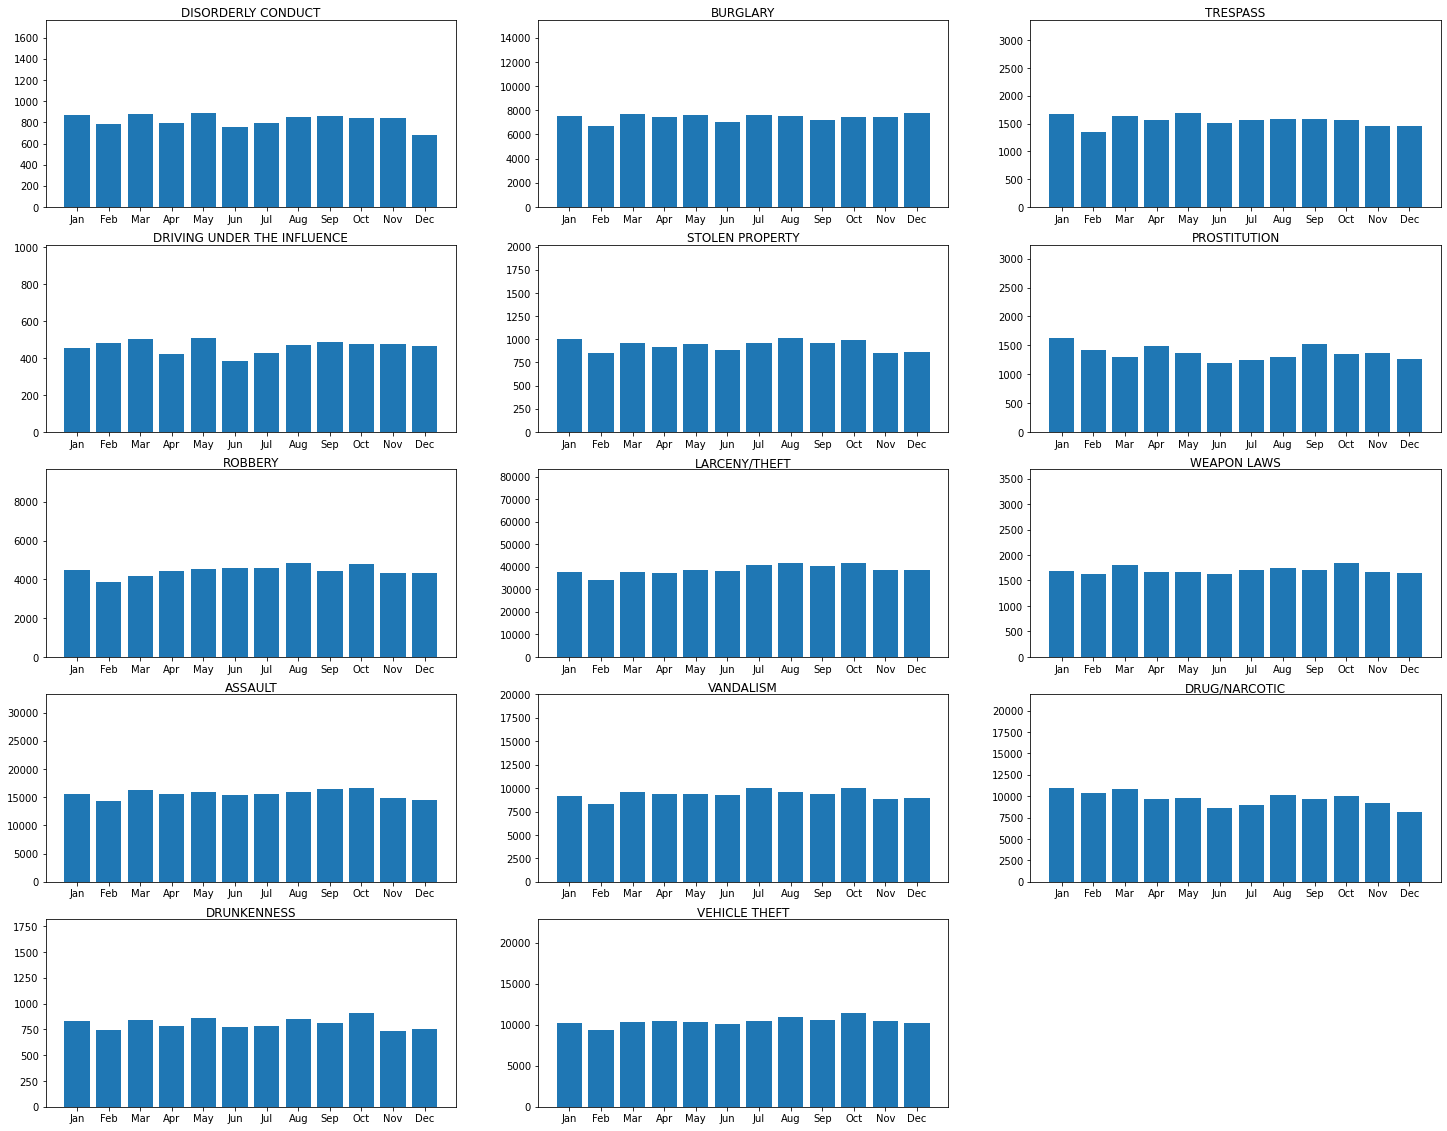

In [141]:
plotFocusCrimes(df_p1, month_array, month_labels, 'Month')

ValueError: ignored

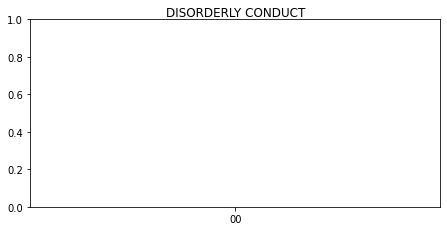

In [143]:
plotFocusCrimes(df_p1, hour_array, hour_labels, 'Hour')

<function matplotlib.pyplot.show>

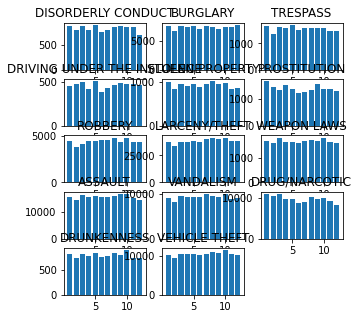

In [84]:
  plt.figure(figsize=(5,5))

  time_list = month_array
  time_category = 'Month'

  for j,crime in enumerate(focuscrimes):
    numbers = np.zeros(len(time_list))
    bin = np.zeros(len(time_list))
    for i, item in enumerate(time_list):
      numbers[i] = len(df_p1[(df_p1[time_category]==item) & (df_p1['Category'] == crime)])
      bin[i] = str(i+1)
    
    plt.subplot(5,3,j+1)
    plt.title(crime)
    plt.bar(bin,numbers)
  plt.show

NameError: ignored

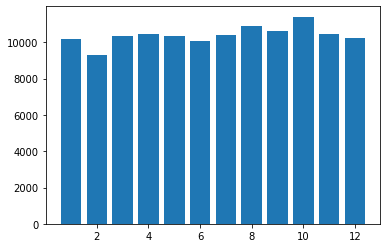

In [87]:

fig, axs = plt.subplots(1, 2, constrained_layout=True)

plt.bar(bin,numbers)
ax = axs[1]
ax.plot(range(10))
ax.set_xlabel('X-label')
ax.set_title('rcParam y')

# Part 4

##### **4.1) First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.**

##### **4.2) Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).**

A map is constructed with the coordinates for San Fransisco (37.765, -122.43) and a popup marker is placed at the City Hall : 

In [144]:
lat = 37.765 ; lon = -122.43                                                                       # Latitude and longitude for San Fransisco
map_SF = folium.Map([lat, lon], zoom_start=13, height='80%', width='60%',zoom_control=False)       # Create map
folium.Marker([37.77919,-122.41914], popup='City Hall').add_to(map_SF)                             # Add popup Marker

# Make title
title_lat = 37.812 ; title_lon = -122.518                                                          
folium.map.Marker([title_lat, title_lon], icon=folium.features.DivIcon(icon_size=(190,36),icon_anchor=(0,0),html='<div style="font-size: 20pt"><b>Location of San Fransisco City Hall</b></div>',)).add_to(map_SF)

map_SF

From the interactive map the exact location of the San Fransisco City Hall is marked with a popup marker, that tells you what to find at this location on mouse click.

##### **4.3) Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.**

Data is filtrered to only contain DRUG/NARCOTIC crimes in the period 2016 June-July:

In [145]:
# Create filtered data set
filter = (df['Year']==2016) & ((df['Month']==6) | (df['Month']==7)) &(df['Category'] == 'DRUG/NARCOTIC')      # Create Filter
df_filtered = df[filter]                                                                                      # Apply Filter

Crime data is plotted on a map of SF. A map filter is added to increase visabilisity of the plotted crime positions:

In [146]:
# Create map
map_SF = folium.Map([lat, lon], tiles = "Stamen Toner", zoom_start=13, height='80%', width='60%', zoom_control=False)

# Plot data coordinates
for index, row in df_filtered.iterrows():
  folium.CircleMarker([row['Y'], row['X']], radius=1, color='red').add_to(map_SF)

# Add title
folium.map.Marker([title_lat, title_lon], icon=folium.features.DivIcon(icon_size=(190,36),icon_anchor=(0,0),html='<div style="color: white; font-size: 20pt"><b>Location of drug/narcotic crimes in June/July 2016</b></div>',)).add_to(map_SF)

map_SF


From the interactive map trends in drug/narcotic crimes can be found in the period June/July 2016. By zooming in and out exact locations of hot spots can be found. A clutering of crimes reported can be seen in the *Tenderloin District* - around the end of *Turk Street* and *Golden Gate Avenue*. Other clusterings appear in *6th Street*, down *3rd Street*, at *16th Mission St* Metro station  and just before *Golden Gate Park* 

# Part 5

##### **5.1) For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).**

1. ...

2. With too small bins in a histogram the crimes would collide and a the plot would seem like noise? If one was not to find this error it could seem like the crimes in San Fransisco was organized to be initiated at the same time on purpose

3. (This is due to people reporting sex offenses at the police station?)